In [249]:
import pandas as pd
import numpy as np
import cv2
from pathlib import Path
import matplotlib.pyplot as plt
import skimage
from skimage import io

In [250]:
PATH = Path().cwd().parent.parent
DDIR = PATH / 'tugas-2' / 'assets'
DDIR

WindowsPath('d:/KULIAH/Mata Kuliah/semester-4/tugas-2/assets')

In [251]:
img_listNo = [int(i) for i in range(607, 610)]
img_listNo

[607, 608, 609]

In [252]:
# Konversi ke matrix pixel
save = []
for j in img_listNo:
    pixel = cv2.imread(f'D:/KULIAH/Mata Kuliah/semester-4/PPDM/tugas-2/assets/happy/happy-0{img_listNo}.jpg', 0)
    save.append(pixel)

save[0]

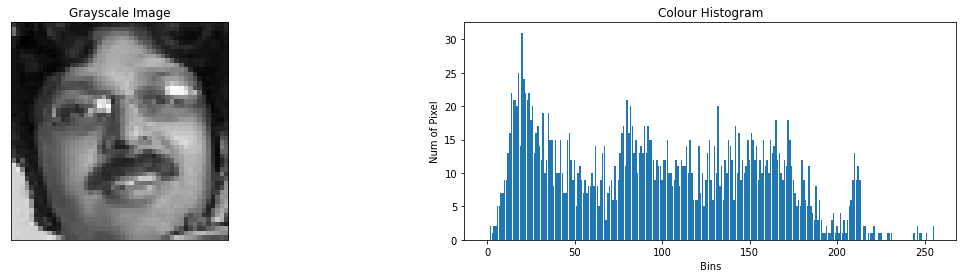

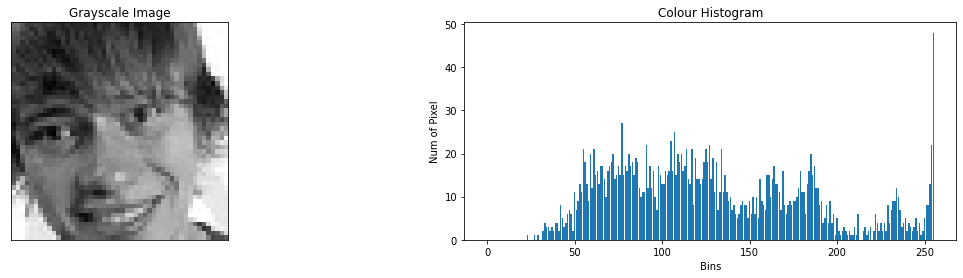

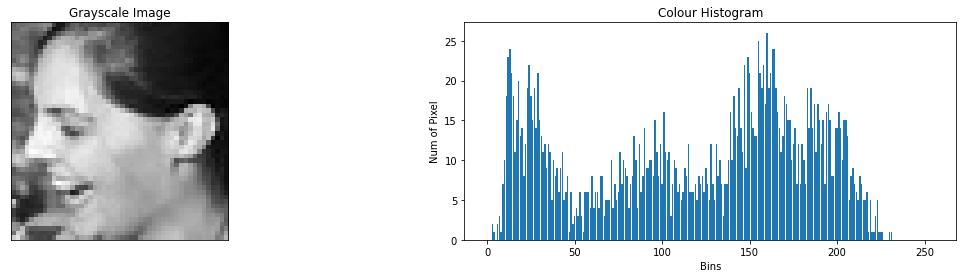

In [253]:
# Color Histogram
# Looping untuk menampilkan setiap gambar
for img in range(len(img_listNo)):
    # Size canvas visualisasi
    plt.figure(figsize=(30,4))

    # Read gambar grayscale, lgsg berubah jadi pixel matriks
    img = io.imread(f'D:/KULIAH/Mata Kuliah/semester-4/PPDM/tugas-2/assets/happy/happy-0{img_listNo[img]}.jpg')

    # Pembuatan colour histogram
    histogram, _ = np.histogram(img, bins=np.arange(0, 257))

    # Menampilkan hasil
    plt.subplot(131), plt.imshow(img, cmap='gray')
    plt.title('Grayscale Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(132), plt.bar(np.arange(0, 256), histogram)
    plt.title('Colour Histogram'), plt.xlabel('Bins'), plt.ylabel('Num of Pixel')
    plt.show()


In [254]:
import cv2
import numpy as np


save = {}
for i in img_listNo:
    img = cv2.imread(f'D:/KULIAH/Mata Kuliah/semester-4/PPDM/tugas-2/assets/happy/happy-0{i}.jpg', 0)
    # Hitung mean
    mean = np.mean(img)
    # Hitung variance
    variance = np.var(img)
    # Hitung standar deviasi
    std_dev = np.sqrt(variance)
    # Hitung skewness
    skewness = np.mean((img - mean)**3) / (std_dev**3)
    # Hitung kurtosis
    kurtosis = np.mean((img - mean)**4) / (std_dev**4)
    save[f'happy-0{i}'] = [mean,variance,std_dev,skewness,kurtosis]

# Return hasil dalam bentuk dataframe
pd.DataFrame.from_dict(save, orient='index', columns=['mean', 'variance', 'std_dev', 'skewness', 'kurtosis'])


,mean,variance,std_dev,skewness,kurtosis
happy-0607,97.274740,3415.194917,58.439669,0.199839,1.970237
happy-0608,128.826823,3264.024263,57.131640,0.562514,2.456163
happy-0609,118.230903,4035.061267,63.522132,-0.300744,1.772170


In [255]:
import cv2
import numpy as np
import pandas as pd

def glcm_matrix(img):
    # Hitung matrix co-ocurrence
    glcm = cv2.calcHist([img], [0], None, [256], [0, 256])
    glcm_matrix = np.zeros((256, 256))
    for i in range(256):
        for j in range(256):
            glcm_matrix[i, j] = glcm[i] * glcm[j]

    # Normalisasi
    glcm_matrix_norm = glcm_matrix / np.sum(glcm_matrix)

    # Hitung features
    contrast = np.sum(glcm_matrix_norm * np.square(np.arange(256) - np.arange(256)[:, np.newaxis]))
    correlation = np.sum(glcm_matrix_norm * (np.arange(256) - np.mean(np.arange(256))) * (np.arange(256)[:, np.newaxis] - np.mean(np.arange(256))) / (np.std(np.arange(256)) * np.std(np.arange(256)[:, np.newaxis])))
    energy = np.sum(np.square(glcm_matrix_norm))
    homogeneity = np.sum(glcm_matrix_norm / (1 + np.square(np.arange(256) - np.arange(256)[:, np.newaxis])))

    # Buat dataframe
    df = pd.DataFrame({
        'Contrast': [contrast],
        'Correlation': [correlation],
        'Energy': [energy],
        'Homogeneity': [homogeneity]
    })
    
    return df

# Contoh penggunaan
img = cv2.imread('D:/KULIAH/Mata Kuliah/semester-4/PPDM/tugas-2/assets/happy/happy-0607.jpg', 0)
glcm_matrix(img)


,Contrast,Correlation,Energy,Homogeneity
0,6830.389835,0.167282,0.000033,0.016931


In [256]:
import cv2
import numpy as np
import pandas as pd


def glcm(image, d, theta):
    # Konversi ke grayscale jika belum grayscale
    if len(image.shape) > 2:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Hitung matrix GLCM
    glcm_matrix = np.zeros((256, 256))

    # Loop untuk mengisi nilai matrix GLCM
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            # Tentukan koordinat piksel tujuan sesuai dengan nilai d dan theta
            if theta == 0:
                x = i
                y = j + d
            elif theta == 45:
                x = i - d
                y = j + d
            elif theta == 90:
                x = i - d
                y = j
            elif theta == 135:
                x = i - d
                y = j - d
            
            # Cek apakah koordinat piksel tujuan berada dalam range gambar
            if x >= 0 and y >= 0 and x < image.shape[0] and y < image.shape[1]:
                glcm_matrix[image[i][j], image[x][y]] += 1

    return glcm_matrix.astype(int)

def normalize_glcm(glcm_matrix):
    # Hitung jumlah total nilai pada matriks
    total = np.sum(glcm_matrix)

    # Normalisasi matriks dengan membagi setiap nilai dengan total
    glcm_norm = glcm_matrix / total

    return glcm_norm


def glcm_features(glcm_matrix):
    # Hitung fitur
    contrast = np.sum(np.square(np.arange(glcm_matrix.shape[0]) - np.arange(glcm_matrix.shape[1])) * glcm_matrix)
    dissimilarity = np.sum(np.abs(np.arange(glcm_matrix.shape[0]) - np.arange(glcm_matrix.shape[1])) * glcm_matrix)
    homogeneity = np.sum(glcm_matrix / (1 + np.square(np.arange(glcm_matrix.shape[0]) - np.arange(glcm_matrix.shape[1]))))
    energy = np.sum(np.square(glcm_matrix))
    correlation = np.sum((glcm_matrix * (np.outer(np.arange(glcm_matrix.shape[0]), np.arange(glcm_matrix.shape[1])) - np.mean(glcm_matrix))) / (np.std(glcm_matrix) * np.std(np.outer(np.arange(glcm_matrix.shape[0]), np.arange(glcm_matrix.shape[1])))))

    return contrast, dissimilarity, homogeneity, energy, correlation


# Contoh penggunaan
# untuk menyimpan hasil fitur dari kesembilan gambar
features_list = {}
kat = ['happy','neutral','sad']
index = 0
# Loop untuk membaca setiap gambar dan menghitung fitur GLCM
for j in range(3):
    for k in range(607, 610):
        img_path = f'D:/KULIAH/Mata Kuliah/semester-4/PPDM/tugas-2/assets/{kat[j]}/{kat[j]}-0{k}.jpg'
        img = cv2.imread(img_path, 0)
        glcm_matrix = glcm(img, 1, 0)
        glcm_norm = normalize_glcm(glcm_matrix)
        contrast, dissimilarity, homogeneity, energy, correlation = glcm_features(glcm_norm)
        
        # Menyimpan hasil fitur ke dalam list
        features_list[f'{kat[j]}-{k}'] = [contrast, dissimilarity, homogeneity, energy, correlation]
    index += 1
# Konversi list hasil fitur ke dalam dataframe
df = pd.DataFrame.from_dict(features_list,orient="index" ,columns=['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation'])
df


,contrast,dissimilarity,homogeneity,energy,correlation
happy-607,0.0,0.0,1.0,0.000568,9528.927458
happy-608,0.0,0.0,1.0,0.000629,13824.356203
happy-609,0.0,0.0,1.0,0.000688,12362.809208
neutral-607,0.0,0.0,1.0,0.000854,9779.576936
neutral-608,0.0,0.0,1.0,0.000703,4557.227530
neutral-609,0.0,0.0,1.0,0.000899,10269.959701
sad-607,0.0,0.0,1.0,0.000892,9695.580537
sad-608,0.0,0.0,1.0,0.000602,16010.253585
sad-609,0.0,0.0,1.0,0.000626,7242.381434


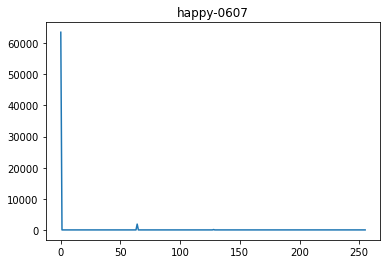

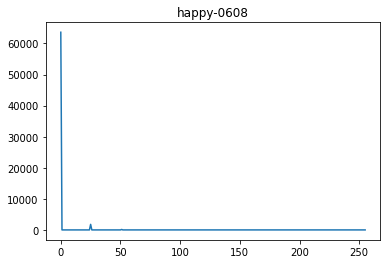

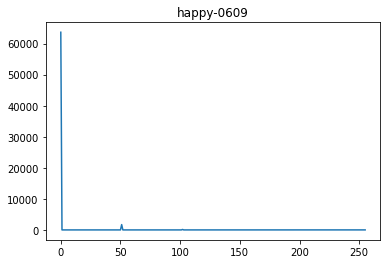

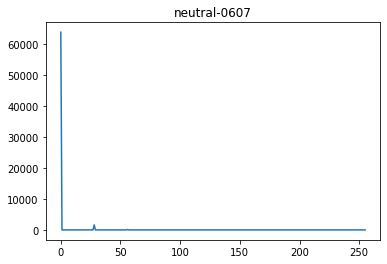

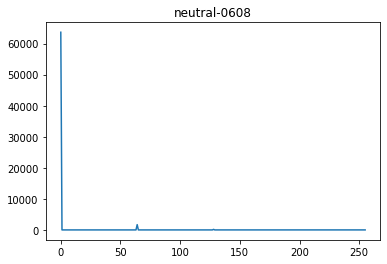

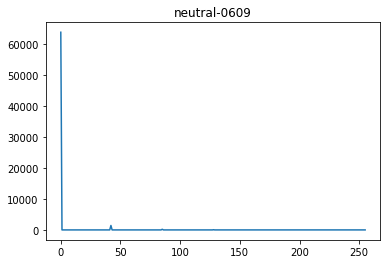

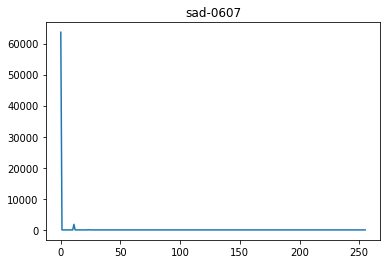

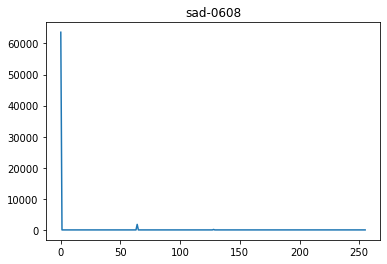

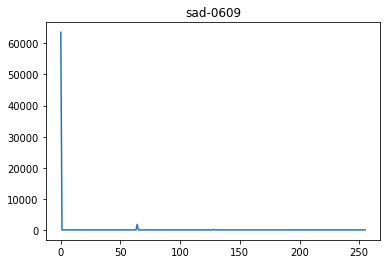

In [268]:
import numpy as np
import matplotlib.pyplot as plt

def texture_histogram(glcm_matrix, num_bins=256):
    # Hitung histogram dengan membagi matrix GLCM ke dalam num_bins bin
    hist, _ = np.histogram(glcm_matrix, bins=num_bins)

    # Normalisasi histogram dengan membagi setiap nilai dengan total jumlah elemen dalam matrix GLCM
    total = np.sum(glcm_matrix)
    hist_norm = hist / total

    return hist_norm

# Contoh penggunaan
for j in range(len(img_listNo)):
    for k in img_listNo:
        img_path = f'D:/KULIAH/Mata Kuliah/semester-4/PPDM/tugas-2/assets/{kat[j]}/{kat[j]}-0{k}.jpg'
        img = cv2.imread(img_path, 0)
        glcm_matrix = glcm(img, 2, 135)
        glcm_norm = normalize_glcm(glcm_matrix)
        hist = texture_histogram(glcm_norm)

        # Visualisasi histogram
        plt.plot(hist),plt.title(f"{kat[j]}-0{k}")
        plt.show()

In [273]:
def calculate_second_order_stats(glcm_matrix):
    # Hitung second order statistics dari matrix GLCM
    contrast = np.sum(glcm_matrix * np.square(np.arange(glcm_matrix.shape[0], dtype=np.float) - np.arange(glcm_matrix.shape[1], dtype=np.float)))
    dissimilarity = np.sum(glcm_matrix * np.abs(np.arange(glcm_matrix.shape[0], dtype=np.float) - np.arange(glcm_matrix.shape[1], dtype=np.float)))
    homogeneity = np.sum(glcm_matrix / (1 + np.square(np.arange(glcm_matrix.shape[0], dtype=np.float) - np.arange(glcm_matrix.shape[1], dtype=np.float))))
    energy = np.sum(np.square(glcm_matrix))
    correlation = np.sum(glcm_matrix * (np.arange(glcm_matrix.shape[0], dtype=np.float) - np.mean(np.arange(glcm_matrix.shape[0], dtype=np.float))) \
                        * (np.arange(glcm_matrix.shape[1], dtype=np.float) - np.mean(np.arange(glcm_matrix.shape[1], dtype=np.float)))) \
                        / (np.std(np.arange(glcm_matrix.shape[0], dtype=np.float)) * np.std(np.arange(glcm_matrix.shape[1], dtype=np.float)))

    return contrast, dissimilarity, homogeneity, energy, correlation

for j in range(len(img_listNo)):
    for k in img_listNo:
        # Load citra Lena
        img = cv2.imread(f'D:/KULIAH/Mata Kuliah/semester-4/PPDM/tugas-2/assets/{kat[j]}/{kat[j]}-0{k}.jpg', 0)

        # Hitung matrix GLCM
        glcm_matrix = glcm(img, 1, 0)

        # Normalisasi GLCM
        glcm_norm = normalize_glcm(glcm_matrix)

        # Hitung second order statistics
        contrast, dissimilarity, homogeneity, energy, correlation = calculate_second_order_stats(glcm_norm)

        print(f"{kat[j]}-0{k}")
        print(f"Contrast: {contrast}")
        print(f"Dissimilarity: {dissimilarity}")
        print(f"Homogeneity: {homogeneity}")
        print(f"Energy: {energy}")
        print(f"Correlation: {correlation}")
        print(30*"~")

happy-0607
Contrast: 0.0
Dissimilarity: 0.0
Homogeneity: 1.0
Energy: 0.0005678317237563503
Correlation: 0.7779175980351575
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
happy-0608
Contrast: 0.0
Dissimilarity: 0.0
Homogeneity: 0.9999999999999999
Energy: 0.0006291339721341984
Correlation: 0.589247908783515
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
happy-0609
Contrast: 0.0
Dissimilarity: 0.0
Homogeneity: 0.9999999999999999
Energy: 0.0006884714048589104
Correlation: 0.7643446980580458
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
neutral-0607
Contrast: 0.0
Dissimilarity: 0.0
Homogeneity: 0.9999999999999999
Energy: 0.0008539088828529752
Correlation: 1.1280595556378026
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
neutral-0608
Contrast: 0.0
Dissimilarity: 0.0
Homogeneity: 0.9999999999999999
Energy: 0.0007034040038227453
Correlation: 0.7671508971168566
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
neutral-0609
Contrast: 0.0
Dissimilarity: 0.0
Homogeneity: 1.0
Energy: 0.000899099642875107
Correlation: 0.17440315309831195
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
sad-0607
Co

C:\Users\hp\AppData\Local\Temp/ipykernel_25128/4061201374.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  contrast = np.sum(glcm_matrix * np.square(np.arange(glcm_matrix.shape[0], dtype=np.float) - np.arange(glcm_matrix.shape[1], dtype=np.float)))
C:\Users\hp\AppData\Local\Temp/ipykernel_25128/4061201374.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-note